# RANSAC
**RANdom SAmple Consensus (RANSAC)** is an iterative framework to estimate a parametric model from observations with noisy outliers.
## Algorithm
1. Randomly select a sample of s data points from S and instantiate the model from this subset
2. Determine the set of data points Si which are within a distance threshold t of the model. The set Si is the consensus set of the sample and defines the inliers of S
3. If the size of Si (the number of inliers) is greater than some threshold T, re‐estimate the model using all points in Si and terminate
4. If the size of Si is less than T, select a new subset and repeat the above
5. After N trials the largest consensus set Si is selected, and the model is re‐estimated using all points in the subset Si

In [1]:
!pip install numpy matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


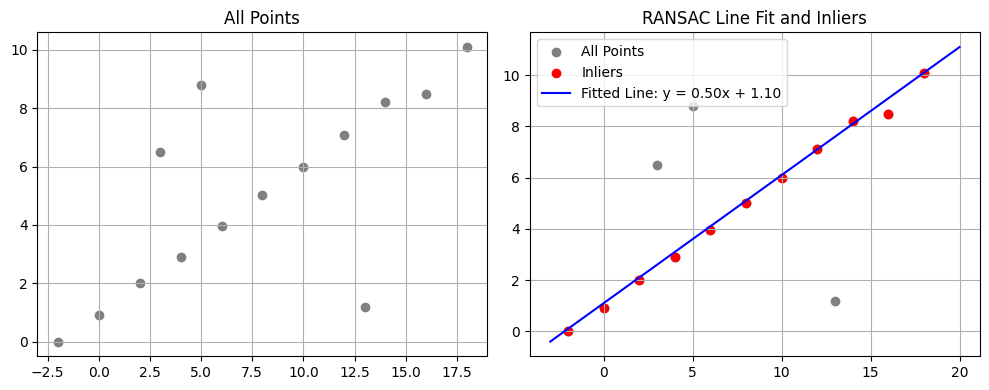

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def line_from_points(p1, p2):
    if p2[0] - p1[0] == 0:  # Avoid division by zero error
        return np.inf, p1[0]  # Vertical line
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]
    return m, b

def ransac_line_fit(points, iterations=100, threshold=1.0):
    best_inliers = []
    best_m, best_b = 0, 0
    n_points = len(points)
    for _ in range(iterations):
        idx1, idx2 = np.random.choice(n_points, 2, replace=False)
        p1, p2 = points[idx1], points[idx2]
        m, b = line_from_points(p1, p2)
        inliers = []
        for point in points:
            # Distance from point to line formula
            distance = abs(point[1] - (m*point[0] + b)) / (np.sqrt(1 + m**2) if m != np.inf else 1)
            if distance < threshold:
                inliers.append(point)
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_m, best_b = m, b
    return best_m, best_b, best_inliers


points = [(-2, 0), (0, 0.9), (2, 2.0), (3, 6.5), (4, 2.9), (5, 8.8), 
              (6, 3.95), (8, 5.03), (10, 5.97), (12, 7.1), (13, 1.2), (14, 8.2), 
              (16, 8.5), (18, 10.1)]

m, b, inliers = ransac_line_fit(points)

x = np.linspace(-3, 20, 400)
y = m*x + b if m != np.inf else [b]*len(x)

# Create a 1x2 subplot layout
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# The first subplot displays all points
ax[0].scatter(*zip(*points), color='gray', label='All Points')
ax[0].set_title('All Points')
ax[0].grid(True)

# The second subplot displays inliers and the fitted line
ax[1].scatter(*zip(*points), color='gray', label='All Points')
ax[1].scatter(*zip(*inliers), color='red', label='Inliers')
ax[1].plot(x, y, color='blue', label=f'Fitted Line: y = {m:.2f}x + {b:.2f}')
ax[1].set_title('RANSAC Line Fit and Inliers')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()